In [2]:
import pylab
import h5py
import math
import array
import gwnr
import gwnr.waveform.esigma_utils as eu
from numpy import *
import numpy as np
from pycbc.types import TimeSeries, FrequencySeries
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc import types, fft, waveform
import lal
from scipy import interpolate
from scipy.interpolate import interp1d
from lal import MSUN_SI, MTSUN_SI, G_SI, PC_SI, C_SI, PI
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower
from tqdm import tqdm
import pycbc.conversions as convert

import lal
import lalsimulation as ls

from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams.update({'figure.autolayout': True})
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
#plt.rcParams["font.family"] = "monospace"
 
from matplotlib import gridspec
from matplotlib import ticker



from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib as mpl

#plt.style.reload_library()
#plt.style.use(['science','notebook'])



#pylab.rc('xtick', labelsize=15) 
#pylab.rc('ytick', labelsize=15) 
#pylab.rc('axes', labelsize=16)
#pylab.rc('legend', fontsize=15)

In [3]:
m = 30
M_SI = m*MSUN_SI
D_SI = 10**6 * (PC_SI)
angle = 0
d = 1
delta_t = 1./4096
mode2polfac=4*(5/(64*np.pi))**(1/2)

hyb = ['1355','1356','1357','1358','1359','1360','1361','1362','1363','1364','1365','1366','1367','1368','1369','1370','1371','1372','1373','1374']
 
q0 = [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3]

l0 = [1.423,1.574,0.451,-2.682,1.834,-0.395,-1.019,-0.507,-0.912,-0.181,-1.127,-2.890,1.687,0.420,-0.203,3.063,0.665,3.005,1.682,3.114]

e0 = [0.173, 0.230, 0.322, 0.322, 0.317, 0.416, 0.416, 0.483, 0.505, 0.172, 0.209, 0.320, 0.320, 0.324, 0.478, 0.508, 0.204, 0.300, 0.300, 0.495]

f0 = [16.53, 15.63, 13.74, 13.51, 13.92, 12.18, 11.95, 12.78, 11.62, 16.68, 15.72, 13.76, 13.84, 13.36, 12.87, 10.69, 15.94, 13.75, 13.74, 10.62]

print(len(hyb),len(q0),len(l0),len(e0),len(f0))


20 20 20 20 20


In [4]:
for i in tqdm(range(len(q0))):
    simulation = '/home/pratul/Downloads/Project/NR_data/'+hyb[i]+'_rhOverM_Asymptotic_GeometricUnits_CoM.h5'
    sims = simulation.split('_')[0]
    lp = 2 #modes
    mp = 2
    tref = 640
    mode = 'l'+str(lp)+'_m'+str(mp)
    with h5py.File(simulation, 'r') as hdf:
        temp=hdf['OutermostExtraction.dir']['Y_'+mode+'.dat']
        test=np.array(temp)

        x1=test[:,0]
        y1=test[:,1]    
        z1=test[:,2]


    plotband=np.where(x1>=tref)
    x1=x1[plotband]
    y1=y1[plotband]    
    z1=z1[plotband]
    x1=x1-x1[np.argmax(y1+1j*z1)]
    
    globals()['tNR'+hyb[i]],globals()['NRAmp'+hyb[i]]= x1, abs(y1+1j*z1)

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 137.16it/s]


In [5]:
for i in range(len(q0)):
    M1 = convert.mass1_from_mtotal_q(m,q0[i])
    M2 = convert.mass2_from_mtotal_q(m,q0[i])
    globals()['hp'+hyb[i]],globals()['hc'+hyb[i]]=get_td_waveform(approximant='EccentricTD',mass1=M1,mass2=M2,delta_t=delta_t,f_lower=f0[i],eccentricity=e0[i])

In [6]:
tPN1364 = (np.loadtxt('outputPN1364_time.txt'))
hPN1364 = (np.loadtxt('outputPN1364.txt'))

tPN1355 = (np.loadtxt('outputPN1355_time.txt'))
hPN1355 = (np.loadtxt('outputPN1355.txt'))

tPN1371 = (np.loadtxt('outputPN1371_time.txt'))
hPN1371 = (np.loadtxt('outputPN1371.txt'))

# tNR1364 = (np.loadtxt('outputNR1364.txt', delimiter=',', skiprows=1))[:,0]
# hNR1364 = (np.loadtxt('outputNR1364.txt', delimiter=',', skiprows=1))[:,1]
lst = 166652

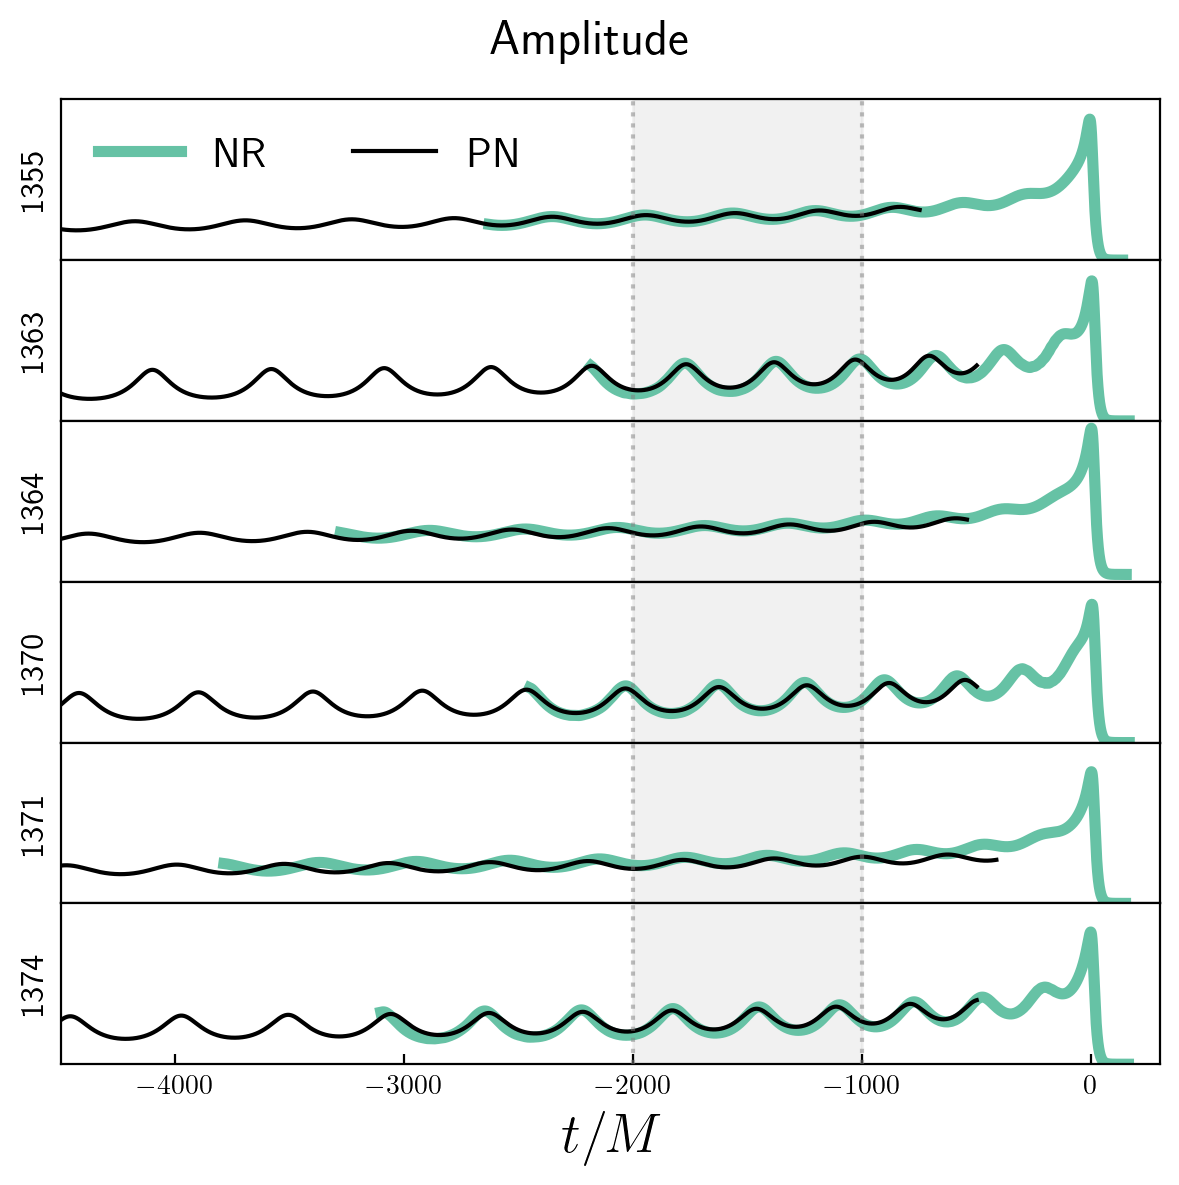

In [7]:
fig = plt.figure(figsize=(6,6))

cmap = plt.get_cmap('Set2', 7)
                    

gs = gridspec.GridSpec(6, 1)#, height_ratios=[1, 1]) 
gs.update(hspace=0.0)
ax0 = plt.subplot(gs[0])
ax0.plot(tNR1355 , NRAmp1355, linewidth=4, color=cmap(0),label="NR")
#ax0.plot(hp1355.sample_times / (m * MTSUN_SI)-80, abs(hp1355 + 1j * hc1355) / (G_SI * M_SI / D_SI / C_SI / C_SI * mode2polfac),color='black', label='PN') #abs(hp_model+1j*hc_model))
ax0.plot(tPN1355[:149985]-250, hPN1355[:149985], color='black', label='PN')
ax0.set_xlim(-4500,300)
ax0.set_ylim(0.0,0.45)
plt.setp(ax0.get_yticklabels(), visible=False)
ax0.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.legend(frameon=False, fontsize=15, ncol=2)
plt.ylabel(r'1355',size=12)

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax1 = plt.subplot(gs[1],sharex=ax0)
ax1.plot(tNR1363 , NRAmp1363, linewidth=4, color=cmap(0))
time = hp1363.sample_times/(m*MTSUN_SI) - 130
mask = time <-500
ax1.plot(time[mask], abs(hp1363[mask] + 1j * hc1363[mask]) / (G_SI * M_SI / D_SI / C_SI / C_SI * mode2polfac), color='black')
plt.setp(ax1.get_yticklabels(), visible=False)
ax1.set_xlim(-4500,300)
ax1.set_ylim(0.,0.45)
plt.setp(ax0.get_yticklabels(), visible=False)
ax1.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1363',size=12)

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax2 = plt.subplot(gs[2],sharex=ax0)
ax2.plot(tNR1364, NRAmp1364, linewidth=4, color=cmap(0))
#ax2.plot(hp1364.sample_times / (m * MTSUN_SI)+15, abs(hp1364 + 1j * hc1364) / (G_SI * M_SI / D_SI / C_SI / C_SI * mode2polfac), color='black')
ax2.plot(tPN1364[:166652], hPN1364[:166652], color='black')
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xlim(-4500,300)
#ax2.set_ylim(0.,0.4)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1364',size=12)

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)


ax3 = plt.subplot(gs[3],sharex=ax0)
ax3.plot(tNR1370, NRAmp1370, linewidth=4, color=cmap(0))  #-160
time = (hp1370.sample_times) / (m * MTSUN_SI)+220
mask = time <-500
ax3.plot(time[mask], abs(hp1370[mask] + 1j * hc1370[mask]) / (G_SI * M_SI / D_SI / C_SI / C_SI * mode2polfac), color='black')
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_xlim(-4500,300)
ax3.set_ylim(0.,0.4)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1370',size=12)

#plt.text(-3, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax4 = plt.subplot(gs[4],sharex=ax0)
ax4.plot(tNR1371, NRAmp1371, linewidth=4, color=cmap(0))
#ax4.plot(hp1371.sample_times / (m * MTSUN_SI)+95, abs(hp1371 + 1j * hc1371) / (G_SI * M_SI / D_SI / C_SI / C_SI * mode2polfac), color='black')
ax4.plot(tPN1371[:207115]+350, hPN1371[:207115], color='black')
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.set_xlim(-4500,300)
ax4.set_ylim(0.,0.35)
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1371',size=12)

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax5 = plt.subplot(gs[5],sharex=ax0)
ax5.plot(tNR1374, NRAmp1374, linewidth=4, color=cmap(0))
time = (hp1374.sample_times) / (m * MTSUN_SI)+50
mask = time <-500
ax5.plot(time[mask], abs(hp1374[mask] + 1j * hc1374[mask]) / (G_SI * M_SI / D_SI / C_SI / C_SI * mode2polfac), color='black')
plt.setp(ax5.get_yticklabels(), visible=False)
ax5.set_xlim(-4500,300)
ax5.set_ylim(0.,0.35)
plt.setp(ax5.get_yticklabels(), visible=False)
ax5.yaxis.set_label_position("left")
plt.tick_params(left=False,direction='in')
plt.ylabel(r'1374',size=12)
plt.xlabel(r'$t/M$', size=20)

#ax0.xaxis.set_label_position("top")

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
#plt.ylabel(r'$\mathcal{A}_{22}$')
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

plt.suptitle(r'Amplitude', font='Times New Roman',fontsize=18)

plt.tight_layout()
# plt.savefig('/home/pratul/Downloads/Project/Plots_draft/amp_22_PNNR_COMP.pdf',dpi=300)


In [8]:
len(hp1370)

22282

In [9]:
for i in tqdm(range(len(q0))):
    simulation = '/home/pratul/Downloads/Project/NR_data/'+hyb[i]+'_rhOverM_Asymptotic_GeometricUnits_CoM.h5'
    sims = simulation.split('_')[0]
    lp = 2 #modes
    mp = 2
    tref = 640
    mode = 'l'+str(lp)+'_m'+str(mp)
    with h5py.File(simulation, 'r') as hdf:
        temp=hdf['OutermostExtraction.dir']['Y_'+mode+'.dat']
        test=np.array(temp)

        x1=test[:,0]
        y1=test[:,1]    
        z1=test[:,2]


    plotband=np.where(x1>=tref)
    x1=x1[plotband]
    y1=y1[plotband]    
    z1=z1[plotband]
    x1=x1-x1[np.argmax(y1+1j*z1)]
    
    tot=y1-1j*z1
    amp=abs(tot)
    ph=np.angle(tot)
    phase_NR=np.unwrap(ph)
    w=np.absolute(diff(phase_NR)/diff(x1))
        
        
    globals()['tNR'+hyb[i]],globals()['NRfreq'+hyb[i]]= np.delete(x1,-1), w

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 190.49it/s]


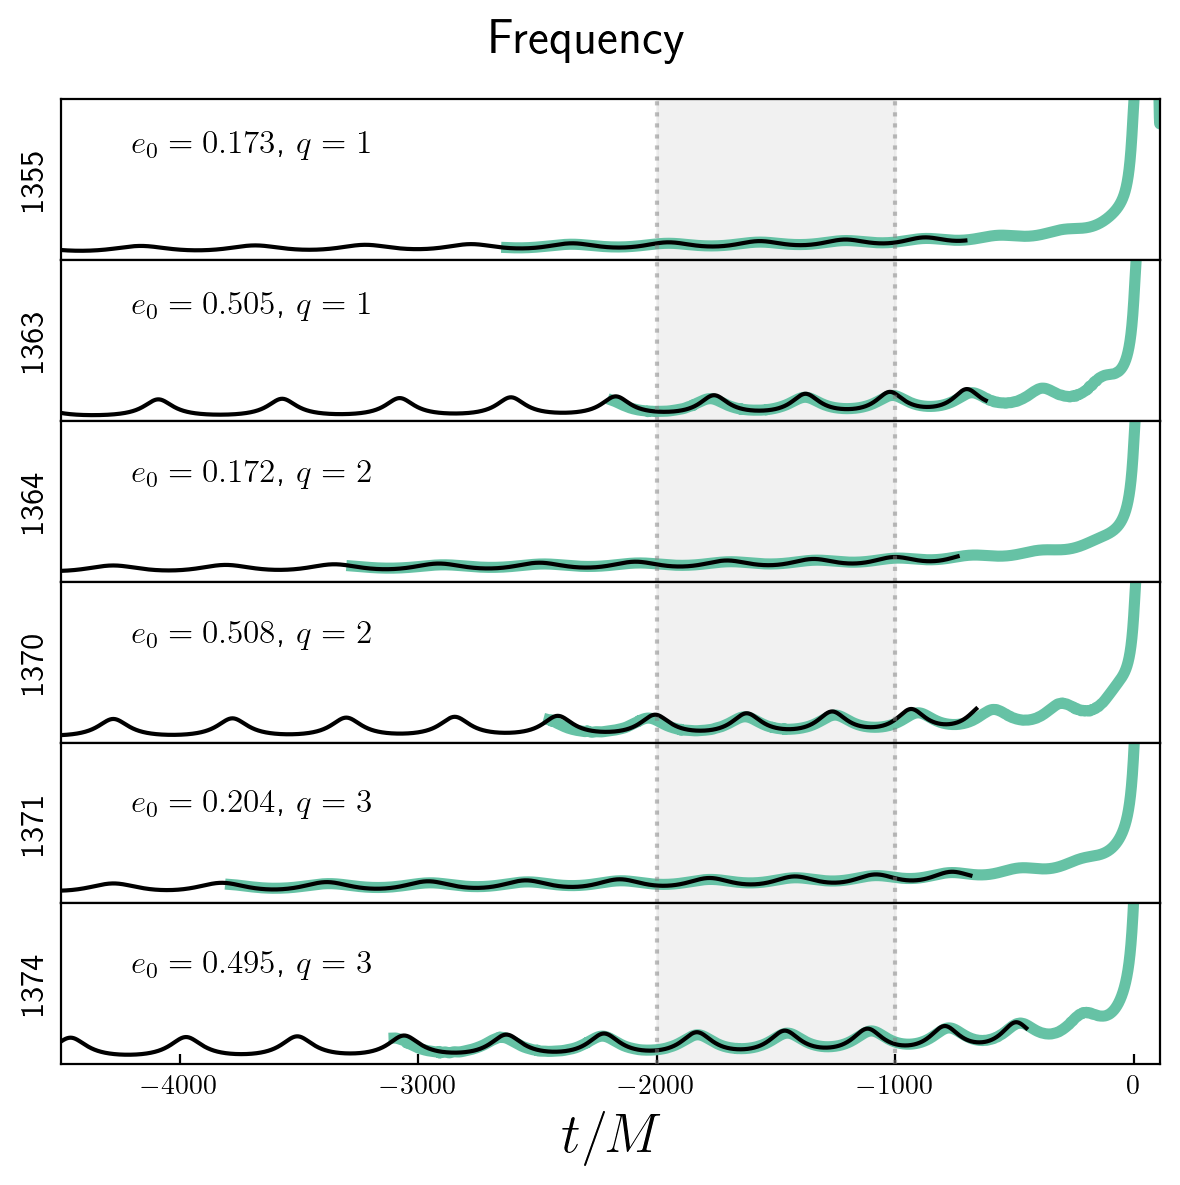

In [16]:
fig = plt.figure(figsize=(6,6))

cmap = plt.get_cmap('Set2', 7)
                    

gs = gridspec.GridSpec(6, 1)#, height_ratios=[1, 1])  
gs.update(hspace=0.0)
ax0 = plt.subplot(gs[0])
ax0.plot(tNR1355 , NRfreq1355, linewidth=4, color=cmap(0),label="NR")
time = hp1355.sample_times/(m*MTSUN_SI)

ph = np.unwrap(np.angle(hp1355 + 1j * hc1355))
freq = diff(ph)/diff(time)
time = np.delete(time,-1)
mask = time <-625
ax0.plot(time[mask]-80, freq[mask],color='black', label='PN') #abs(hp_model+1j*hc_model))
ax0.set_xlim(-4500,110)
ax0.set_ylim(0.0,0.45)
plt.setp(ax0.get_yticklabels(), visible=False)
ax0.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
#plt.legend(frameon=False, fontsize=15, ncol=2)
plt.ylabel(r'1355',size=12)
ax0.text(-4200,0.3,r'$e_0=0.173$, $q=1$',fontsize=12)

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax1 = plt.subplot(gs[1],sharex=ax0)
ax1.plot(tNR1363 , NRfreq1363, linewidth=4, color=cmap(0))
time = hp1363.sample_times/(m*MTSUN_SI)
ph = np.unwrap(np.angle(hp1363 + 1j * hc1363))
freq = diff(ph)/diff(time)
time = np.delete(time,-1)
mask = time <-500
ax1.plot(time[mask]-120, freq[mask],color='black', label='PN') #abs(hp_model+1j*hc_model))plt.setp(ax1.get_yticklabels(), visible=False)
ax1.set_xlim(-4500,110)
ax1.set_ylim(0.,0.45)
plt.setp(ax1.get_yticklabels(), visible=False)
ax1.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1363',size=12)
ax1.text(-4200,0.3,r'$e_0=0.505$, $q=1$',fontsize=12)


#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax2 = plt.subplot(gs[2],sharex=ax0)
ax2.plot(tNR1364, NRfreq1364, linewidth=4, color=cmap(0))
time = hp1364.sample_times/(m*MTSUN_SI)
ph = np.unwrap(np.angle(hp1364 + 1j * hc1364))
freq = diff(ph)/diff(time)
time = np.delete(time,-1)
mask = time <-737.71
ax2.plot(time[mask], freq[mask],color='black', label='PN')
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xlim(-4500,110)
ax2.set_ylim(0.,0.4)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1364',size=12)
ax2.text(-4200,0.25,r'$e_0=0.172$, $q=2$',fontsize=12)

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)


ax3 = plt.subplot(gs[3],sharex=ax0)
ax3.plot(tNR1370, NRfreq1370, linewidth=4, color=cmap(0))
time = hp1370.sample_times/(m*MTSUN_SI)
ph = np.unwrap(np.angle(hp1370 + 1j * hc1370))
freq = diff(ph)/diff(time)
time = np.delete(time,-1)
mask = time <-500
ax3.plot(time[mask]-160, freq[mask],color='black', label='PN')
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_xlim(-4500,110)
ax3.set_ylim(0.,0.4)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1370',size=12)
ax3.text(-4200,0.25,r'$e_0=0.508$, $q=2$',fontsize=12)


#plt.text(-3, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax4 = plt.subplot(gs[4],sharex=ax0)
ax4.plot(tNR1371, NRfreq1371, linewidth=4, color=cmap(0))
time = hp1371.sample_times/(m*MTSUN_SI)
ph = np.unwrap(np.angle(hp1371 + 1j * hc1371))
freq = diff(ph)/diff(time)
time = np.delete(time,-1)
mask = time <-764.21
ax4.plot(time[mask]+80, freq[mask],color='black', label='PN')
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.set_xlim(-4500,110)
ax4.set_ylim(0.,0.35)
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.yaxis.set_label_position("left")
plt.tick_params(left=False,labelbottom = False) 
plt.ylabel(r'1371',size=12)
ax4.text(-4200,0.2,r'$e_0=0.204$, $q=3$',fontsize=12)


#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20) 764.21
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

ax5 = plt.subplot(gs[5],sharex=ax0)
ax5.plot(tNR1374, NRfreq1374, linewidth=4, color=cmap(0))
time = hp1374.sample_times/(m*MTSUN_SI)
ph = np.unwrap(np.angle(hp1374 + 1j * hc1374))
freq = diff(ph)/diff(time)
time = np.delete(time,-1)
mask = time <-500
ax5.plot(time[mask]+50, freq[mask],color='black', label='PN')
plt.setp(ax5.get_yticklabels(), visible=False)
ax5.set_xlim(-4500,110)
ax5.set_ylim(0.,0.35)
plt.setp(ax5.get_yticklabels(), visible=False)
ax5.yaxis.set_label_position("left")
plt.tick_params(left=False,direction='in')
plt.ylabel(r'1374',size=12)
plt.xlabel(r'$t/M$', size=20)
ax5.text(-4200,0.2,r'$e_0=0.495$, $q=3$',fontsize=12)

#ax0.xaxis.set_label_position("top")

#fig.text(-0.03, 0.5, r'$\mathcal{A}_{22}$', va='center', rotation='vertical',fontsize=20)
#plt.ylabel(r'$\mathcal{A}_{22}$')
plt.axvline(x=-2000,color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvline(x=(-1000),color='grey',linestyle=':',zorder=5,alpha=0.5)
plt.axvspan(-2000,-1000,color='lightgrey',alpha=0.3)

plt.suptitle(r'Frequency', font='Times New Roman',fontsize=18)

plt.tight_layout()
plt.savefig('/home/pratul/Downloads/Project/Plots_draft/freq_22_PNNR_COMP.pdf',dpi=300)
